In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Bike Share Data

The data contains an hourly breakdown of bike share rentals by both registered and "guest" users.  It also contains temperature and humidity data.

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (I modified the dataset from here)

One interesting goal here would be to predict the number of passengers by the time/date and weather conditions.

In [2]:
dat = pd.read_csv("../data/bike-hour-raw.csv")

In [3]:
dat

,temp,hum,windspeed,casual,registered,cnt,dtetime
0,3.28,81.0,0.0000,3,13,16,2011-01-01 00:00:00
1,2.34,80.0,0.0000,8,32,40,2011-01-01 01:00:00
2,2.34,80.0,0.0000,5,27,32,2011-01-01 02:00:00
3,3.28,75.0,0.0000,3,10,13,2011-01-01 03:00:00
4,3.28,75.0,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...
17374,4.22,60.0,11.0014,11,108,119,2012-12-31 19:00:00
17375,4.22,60.0,11.0014,8,81,89,2012-12-31 20:00:00
17376,4.22,60.0,11.0014,7,83,90,2012-12-31 21:00:00
17377,4.22,56.0,8.9981,13,48,61,2012-12-31 22:00:00


# Feature Engineering

We previously looked at feature engineering for reasons of *necessity* (e.g. converting critical categorical labels to binary features).  Now we'll look at other methods of generating features. 

Firstly, let's convert the `dteday` field to a proper timestamp.  Notice that we wind up with a `datetime64[ns]` dtype.

In [4]:
dat.dtetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
17374    2012-12-31 19:00:00
17375    2012-12-31 20:00:00
17376    2012-12-31 21:00:00
17377    2012-12-31 22:00:00
17378    2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: object

In [5]:
dat.dtetime = pd.to_datetime(dat.dtetime)
dat.dtetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: datetime64[ns]

Note that we could've done this when we first read in the csv:

In [6]:
pd.read_csv("../data/bike-hour-raw.csv", parse_dates=["dtetime"]).dtetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: datetime64[ns]

We can extract some different (simpler) numeric types, such as day-of-week, week-of-year, etc.

In [7]:
dat["dtime_hr"] = dat.dtetime.dt.hour
dat["dtime_day"] = dat.dtetime.dt.day
dat["dtime_dayofyear"] = dat.dtetime.dt.dayofyear
dat["dtime_week"] = dat.dtetime.dt.isocalendar().week
dat["dtime_month"] = dat.dtetime.dt.month
dat["dtime_year"] = dat.dtetime.dt.year
dat["dtime_quarter"] = dat.dtetime.dt.quarter
dat.index = dat["dtetime"]
dat = dat.drop(["dtetime"], axis=1)

In [8]:
dat

,temp,hum,windspeed,casual,registered,cnt,dtime_hr,dtime_day,dtime_dayofyear,dtime_week,dtime_month,dtime_year,dtime_quarter
dtetime,,,,,,,,,,,,,
2011-01-01 00:00:00,3.28,81.0,0.0000,3,13,16,0,1,1,52,1,2011,1
2011-01-01 01:00:00,2.34,80.0,0.0000,8,32,40,1,1,1,52,1,2011,1
2011-01-01 02:00:00,2.34,80.0,0.0000,5,27,32,2,1,1,52,1,2011,1
2011-01-01 03:00:00,3.28,75.0,0.0000,3,10,13,3,1,1,52,1,2011,1
2011-01-01 04:00:00,3.28,75.0,0.0000,0,1,1,4,1,1,52,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,4.22,60.0,11.0014,11,108,119,19,31,366,1,12,2012,4
2012-12-31 20:00:00,4.22,60.0,11.0014,8,81,89,20,31,366,1,12,2012,4
2012-12-31 21:00:00,4.22,60.0,11.0014,7,83,90,21,31,366,1,12,2012,4


Let's create some dummy features from our engineered "dtime_month" column, and get rid of the rest.

In [9]:
onehot = pd.get_dummies(dat.dtime_month, prefix="dtime_month_")
dat = pd.concat([dat.drop(["dtime_month"], axis=1),onehot], axis=1)
dat = dat.drop(["dtime_day","dtime_dayofyear","dtime_week", "dtime_quarter", "dtime_year"], axis=1)
dat

,temp,hum,windspeed,casual,registered,cnt,dtime_hr,dtime_month__1,dtime_month__2,dtime_month__3,dtime_month__4,dtime_month__5,dtime_month__6,dtime_month__7,dtime_month__8,dtime_month__9,dtime_month__10,dtime_month__11,dtime_month__12
dtetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,3.28,81.0,0.0000,3,13,16,0,1,0,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,2.34,80.0,0.0000,8,32,40,1,1,0,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,2.34,80.0,0.0000,5,27,32,2,1,0,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,3.28,75.0,0.0000,3,10,13,3,1,0,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,3.28,75.0,0.0000,0,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,4.22,60.0,11.0014,11,108,119,19,0,0,0,0,0,0,0,0,0,0,0,1
2012-12-31 20:00:00,4.22,60.0,11.0014,8,81,89,20,0,0,0,0,0,0,0,0,0,0,0,1
2012-12-31 21:00:00,4.22,60.0,11.0014,7,83,90,21,0,0,0,0,0,0,0,0,0,0,0,1


# Custom Feature Engineering

Extracting date time components, or creating one-hot features are considered "standard" feature engineering... essential for extracting information from otherwise marginal or useless data.

In some cases, we may have additional contextual knowledge about the circumstances of the data.  For instance, we may know that temperature is not a perfect proxy for how hot or cold the temperature is *perceived*.  Let's try to adapt and use the "feels like" temperature rating that is commonly used on the weather channel.

In [10]:
from meteocalc import Temp, feels_like

# each individual row-wise record is a named tuple (tup)
def temp_adjust(tup): 
    # meteocalc expects temperatures in Fahrenheit. We can convert with Temp()
    # we also need to pass the humidity and windspeed
    
    atemp = feels_like(Temp(tup.temp,'c'), tup.hum, tup.windspeed)
    tup["atemp"] = atemp.c
    return tup
    
dat = dat.apply(temp_adjust, axis=1) # apply row-wise with axis=1

<AxesSubplot:xlabel='dtetime'>

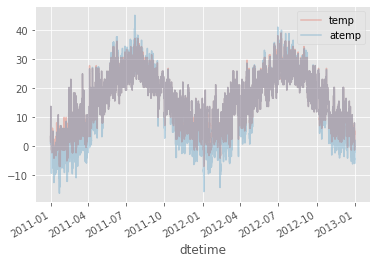

In [11]:
dat[["temp","atemp"]].plot(alpha=.3) # use an alpha since they overlap slightly

# Check for missing values

Looks like there aren't any in this data

In [12]:
dat.isna().sum()

temp               0
hum                0
windspeed          0
casual             0
registered         0
cnt                0
dtime_hr           0
dtime_month__1     0
dtime_month__2     0
dtime_month__3     0
dtime_month__4     0
dtime_month__5     0
dtime_month__6     0
dtime_month__7     0
dtime_month__8     0
dtime_month__9     0
dtime_month__10    0
dtime_month__11    0
dtime_month__12    0
atemp              0
dtype: int64

# Feature Selection


We know that our target is the passenger count, so we can set some initial configuration

## Normalizing Features

Since we're dealing with features on many different scales, it's helpful to normalize them to standard ranges (0-1, or z-scaling also will work)

For instance, our critical measure of adjusted temperature values is on a much different scale than our passenger counts:

<AxesSubplot:xlabel='dtetime'>

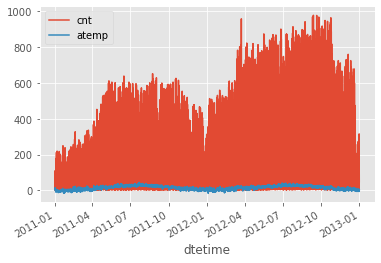

In [13]:
dat[["cnt", "atemp"]].plot()

Once again, we can use describe to get an idea of the statistical overview of the fields

In [14]:
dat.describe()

,temp,hum,windspeed,casual,registered,cnt,dtime_hr,dtime_month__1,dtime_month__2,dtime_month__3,dtime_month__4,dtime_month__5,dtime_month__6,dtime_month__7,dtime_month__8,dtime_month__9,dtime_month__10,dtime_month__11,dtime_month__12,atemp
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,15.358397,62.722884,12.736540,35.676218,153.786869,189.463088,11.546752,0.082226,0.077162,0.084757,0.082686,0.085621,0.082859,0.085621,0.084873,0.082686,0.083492,0.082686,0.085333,14.276556
std,9.050138,19.292983,8.196795,49.305030,151.357286,181.387599,6.914405,0.274716,0.266856,0.278528,0.275415,0.279811,0.275676,0.279811,0.278700,0.275415,0.276632,0.275415,0.279384,10.783781
min,-7.060000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.316378
25%,7.980000,48.000000,7.001500,4.000000,34.000000,40.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.027529
50%,15.500000,63.000000,12.998000,17.000000,115.000000,142.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000
75%,23.020000,78.000000,16.997900,48.000000,220.000000,281.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.020000
max,39.000000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.089325


We can go with "minmax" normalization here, simply substract the min, and divide by the standard deviation.

In [15]:
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()
target = dat.cnt
train = dat.drop(["cnt","registered","casual"], axis=1)
mm.fit(train)
norm_train= pd.DataFrame(mm.transform(train.values), columns=train.columns, index=train.index)
norm_train

,temp,hum,windspeed,dtime_hr,dtime_month__1,dtime_month__2,dtime_month__3,dtime_month__4,dtime_month__5,dtime_month__6,dtime_month__7,dtime_month__8,dtime_month__9,dtime_month__10,dtime_month__11,dtime_month__12,atemp
dtetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.224490,0.81,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319130
2011-01-01 01:00:00,0.204082,0.80,0.000000,0.043478,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303822
2011-01-01 02:00:00,0.204082,0.80,0.000000,0.086957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303822
2011-01-01 03:00:00,0.224490,0.75,0.000000,0.130435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319130
2011-01-01 04:00:00,0.224490,0.75,0.000000,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.244898,0.60,0.193018,0.826087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272257
2012-12-31 20:00:00,0.244898,0.60,0.193018,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272257
2012-12-31 21:00:00,0.244898,0.60,0.193018,0.913043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272257


<AxesSubplot:xlabel='dtetime'>

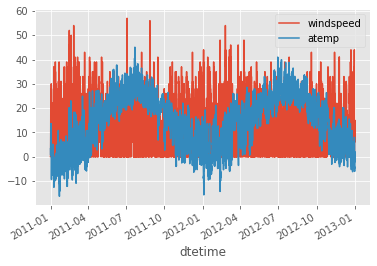

In [16]:
train[["windspeed", "atemp"]].plot()

# Chaining/Pipeline
Coming soon!